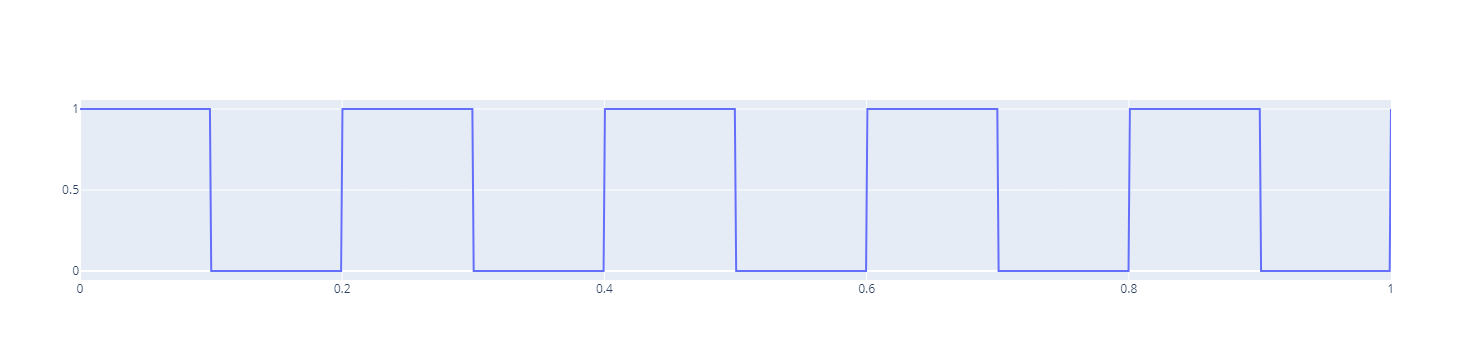

In [16]:
import plotly.graph_objects as go
import numpy as np
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
import pandas as pd
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
y = signal.square(x * np.pi * 2 * 5)/2 + 1/2

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='f(x) = x^2'))
fig.update_layout(
    hovermode="x"
)
fig.show()


In [17]:
f = fft(y)

In [18]:
freq = fftshift(fftfreq(x.shape[-1], d=x[1]-x[0]))


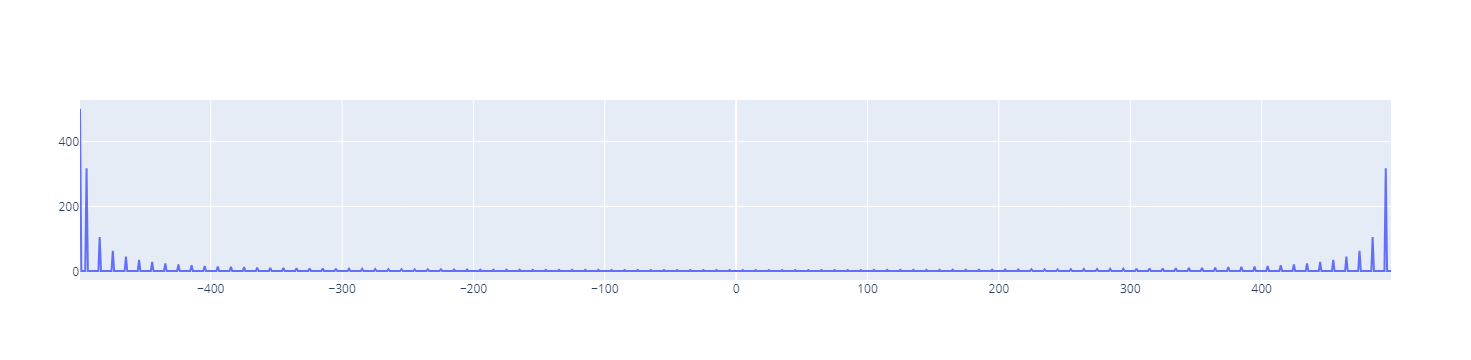

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=freq, y=abs(f), mode='lines'))
fig.update_layout(
    hovermode="x"
)
fig.show()


In [20]:
freq.shape

(1000,)

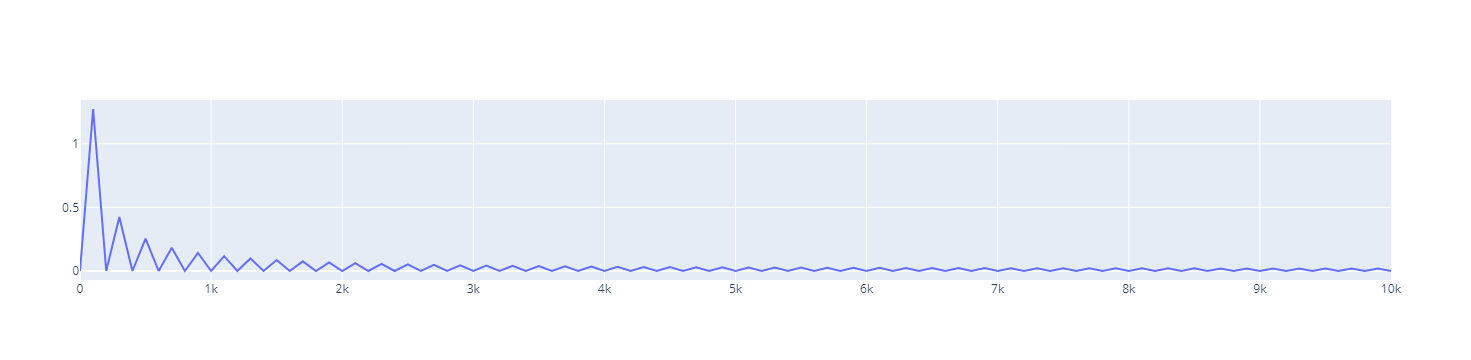

In [21]:
Fs = 20000 #must be at minimum 2x the signal freq
tstep = 1/Fs
f0 = 100
N = int(Fs / f0)
t = np.linspace(0, (N-1)*tstep, N) #time domain domain 

fstep = Fs/N
f = np.linspace(0, (N-1) * fstep, N) #frequency domain 

y = signal.square(2 * np.pi * f0 * t) #

X = np.fft.fft(y)
X_mag = np.abs(X)/len(y)


f_plot = f[0:N//2+1]
x_mag_plot = 2 * X_mag[0:N//2+1]
x_mag_plot[0] /= 2


fig = go.Figure()
#fig.add_trace(go.Scatter(x=t, y=y, mode='lines'))
fig.add_trace(go.Scatter(x=f_plot, y=x_mag_plot, mode='lines'))
fig.update_layout(
    hovermode="x"
)
fig.show()




/tmp/ipykernel_242661/584001590.py:14: RuntimeWarning:

invalid value encountered in divide



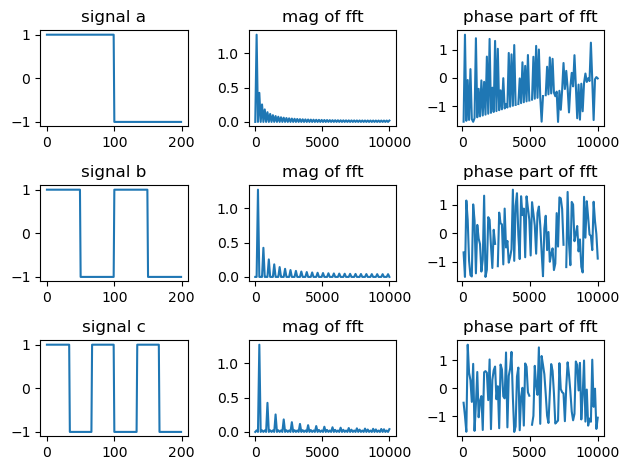

In [23]:
def plot_fft_against_eachother(s1, s2, s3, signame):
    
    s1 = s1.dropna().to_numpy()
    s2 = s2.dropna().to_numpy()
    s3 = s3.dropna().to_numpy()
    i=1
        
    for s, name in zip([s1, s2, s3], signame):
        s = s - np.mean(s)
        n = np.size(s)
        freq = Fs * np.linspace(0, 1, int(n/2))/2
        dft = (fft(s)[0:np.size(freq)] * 2 / n)
        mag = abs(dft)
        phase = np.arctan(dft.imag/dft.real)

        plt.subplot(3, 3, i)
        plt.plot(s)
        plt.title('signal ' + (name if name is not None else ""))
        i+=1
        
        plt.subplot(3, 3, i)
        plt.plot(freq,  mag)
        plt.title('mag of fft')
        i+=1

        plt.subplot(3, 3, i)
        plt.plot(freq, phase)
        
        plt.title('phase part of fft')
        
        i+=1

    plt.tight_layout()

Fs = 20000 #must be at minimum 2x the signal freq
tstep = 1/Fs
f0 = 100
N = int(Fs / f0)
t = np.linspace(0, (N-1)*tstep, N) #time domain domain 
plot_fft_against_eachother(pd.Series(signal.square(2 * np.pi * f0 * t)),
                          pd.Series(signal.square(4 * np.pi * f0 * t)),
                          pd.Series(signal.square(6 * np.pi * f0 * t)),
                          'abc')